In [1]:
from typing import List, Dict, Optional
import torch

import sys 
sys.path.append(".")
sys.path.append("..")

from pipeline import StormPipeline
from config import RunConfig
from run import run_on_prompt, get_indices_to_alter
from utils import vis_utils
from utils.ptp_utils import AttentionStore

%load_ext autoreload 
%autoreload 2

# Load Model Weights

In [2]:
NUM_DIFFUSION_STEPS = 50
GUIDANCE_SCALE = 7.5
MAX_NUM_WORDS = 77
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')
stable = StormPipeline.from_pretrained("CompVis/stable-diffusion-v1-4").to(device)
tokenizer = stable.tokenizer

/nfs/home/woojung/anaconda3/envs/cvpr-storm/lib/python3.8/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
text_encoder/pytorch_model.fp16.safetensors not found


Fetching 21 files:   0%|          | 0/21 [00:00<?, ?it/s]

The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.


# Pipeline Wrapper

In [3]:
def run_and_display(prompts: List[str],
                    controller: AttentionStore,
                    indices_to_alter: List[int],
                    generator: torch.Generator,
                    run_standard_sd: bool = False,
                    scale_factor: int = 20,
                    thresholds: Dict[int, float] = {0:0.05, 10: 0.5, 20: 0.8},
                    max_iter_to_alter: int = 25,
                    display_output: bool = False,
                    sd_2_1: bool = False):
    config = RunConfig(run_standard_sd=run_standard_sd,
                       scale_factor=scale_factor,
                       thresholds=thresholds,
                       max_iter_to_alter=max_iter_to_alter,
                       sd_2_1=sd_2_1)
    image = run_on_prompt(model=stable,
                          prompt=prompts,
                          controller=controller,
                          token_indices=indices_to_alter,
                          seed=generator,
                          config=config)
    if display_output:
        display(image)
    return image

In [4]:
def generate_images_for_method(prompt: str,
                               seeds: List[int],
                               indices_to_alter: Optional[List[int]] = None,
                               is_storm_true: bool = True,
                               sd_2_1: bool = False):
    token_indices = get_indices_to_alter(stable, prompt) if indices_to_alter is None else indices_to_alter
    images = []
    for seed in seeds:
        g = torch.Generator('cuda').manual_seed(seed)
        prompts = [prompt]
        controller = AttentionStore()
        run_standard_sd = False if is_storm_true else True
        image = run_and_display(prompts=prompts,
                                controller=controller,
                                indices_to_alter=token_indices,
                                generator=g,
                                run_standard_sd=run_standard_sd,
                                sd_2_1=sd_2_1)
        images.append(image.resize((256, 256)))
    grid = vis_utils.get_image_grid(images)
    display(grid)

# Stable Diffusion

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

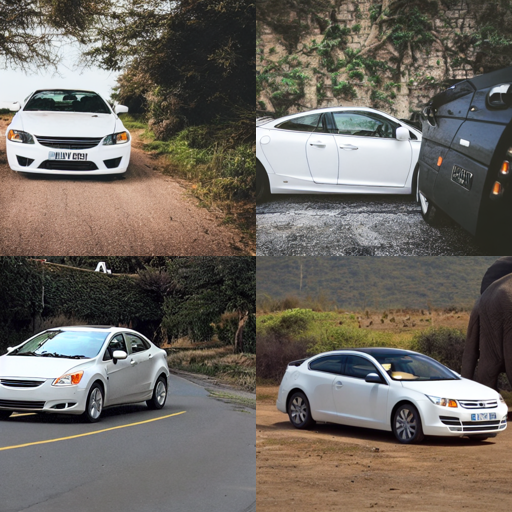

In [5]:
generate_images_for_method(
    prompt="a white car to the left of an elephant",
    indices_to_alter = ([3, 9], [2, None]),
    seeds=[6143, 7792, 8892, 9010],
    is_storm_true=False
)

# STORM

  0%|          | 0/50 [00:00<?, ?it/s]

Iteration 1 | Loss: 0.1336
Iteration 2 | Loss: 0.1583
Iteration 3 | Loss: 0.0228
Iteration 4 | Loss: 0.0189
Iteration 5 | Loss: 0.0165
Iteration 6 | Loss: 0.0131
Iteration 7 | Loss: 0.2001
Iteration 8 | Loss: 0.2007
Iteration 9 | Loss: 0.2246
Iteration 10 | Loss: 0.2010
Iteration 11 | Loss: 0.2126
Iteration 12 | Loss: 0.1984
Iteration 13 | Loss: 0.1968
Iteration 14 | Loss: 0.1927
Iteration 15 | Loss: 0.1904
Iteration 16 | Loss: 0.1867
Iteration 17 | Loss: 0.1836
Iteration 18 | Loss: 0.1801
Iteration 19 | Loss: 0.1750
Iteration 20 | Loss: 0.1705
Iteration 21 | Loss: 0.1647
Iteration 22 | Loss: 0.1602
Iteration 23 | Loss: 0.1565
Iteration 24 | Loss: 0.1534


  0%|          | 0/50 [00:00<?, ?it/s]

Iteration 1 | Loss: 0.1668
Iteration 2 | Loss: 0.2357
Iteration 3 | Loss: 0.0304
Iteration 4 | Loss: 0.0262
Iteration 5 | Loss: 0.0232
Iteration 6 | Loss: 0.0241
Iteration 7 | Loss: 0.2291
Iteration 8 | Loss: 0.2272
Iteration 9 | Loss: 0.2218
Iteration 10 | Loss: 0.2233
Iteration 11 | Loss: 0.2205
Iteration 12 | Loss: 0.2210
Iteration 13 | Loss: 0.2170
Iteration 14 | Loss: 0.2116
Iteration 15 | Loss: 0.2084
Iteration 16 | Loss: 0.2013
Iteration 17 | Loss: 0.1983
Iteration 18 | Loss: 0.1932
Iteration 19 | Loss: 0.1903
Iteration 20 | Loss: 0.1879
Iteration 21 | Loss: 0.1859
Iteration 22 | Loss: 0.1841
Iteration 23 | Loss: 0.1825
Iteration 24 | Loss: 0.1809


  0%|          | 0/50 [00:00<?, ?it/s]

Iteration 1 | Loss: 0.2774
Iteration 2 | Loss: 0.4553
Iteration 3 | Loss: 0.1727
Iteration 4 | Loss: 0.1090
Iteration 5 | Loss: 0.0939
Iteration 6 | Loss: 0.0487
Iteration 7 | Loss: 0.2287
Iteration 8 | Loss: 0.2059
Iteration 9 | Loss: 0.2177
Iteration 10 | Loss: 0.2079
Iteration 11 | Loss: 0.2172
Iteration 12 | Loss: 0.2101
Iteration 13 | Loss: 0.2144
Iteration 14 | Loss: 0.2159
Iteration 15 | Loss: 0.2123
Iteration 16 | Loss: 0.2139
Iteration 17 | Loss: 0.2119
Iteration 18 | Loss: 0.2130
Iteration 19 | Loss: 0.2117
Iteration 20 | Loss: 0.2122
Iteration 21 | Loss: 0.2111
Iteration 22 | Loss: 0.2110
Iteration 23 | Loss: 0.2097
Iteration 24 | Loss: 0.2089


  0%|          | 0/50 [00:00<?, ?it/s]

Iteration 1 | Loss: 0.2898
Iteration 2 | Loss: 0.4610
Iteration 3 | Loss: 0.1835
Iteration 4 | Loss: 0.1080
Iteration 5 | Loss: 0.0803
Iteration 6 | Loss: 0.0760
Iteration 7 | Loss: 0.2312
Iteration 8 | Loss: 0.2269
Iteration 9 | Loss: 0.2205
Iteration 10 | Loss: 0.2186
Iteration 11 | Loss: 0.2142
Iteration 12 | Loss: 0.2110
Iteration 13 | Loss: 0.2074
Iteration 14 | Loss: 0.2067
Iteration 15 | Loss: 0.2047
Iteration 16 | Loss: 0.2037
Iteration 17 | Loss: 0.2035
Iteration 18 | Loss: 0.1995
Iteration 19 | Loss: 0.1988
Iteration 20 | Loss: 0.2003
Iteration 21 | Loss: 0.1989
Iteration 22 | Loss: 0.1987
Iteration 23 | Loss: 0.1978
Iteration 24 | Loss: 0.1969


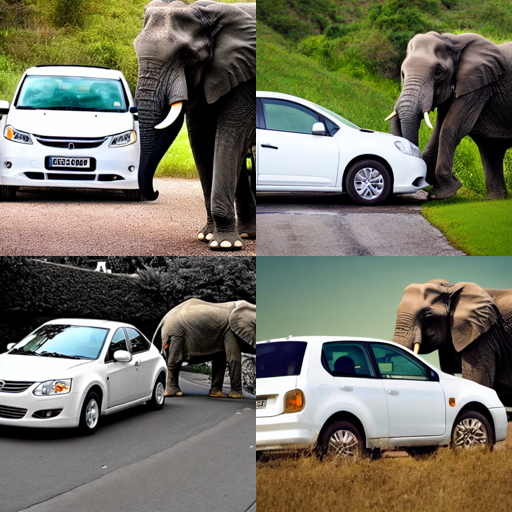

In [6]:
generate_images_for_method(
    prompt="a white car to the left of an elephant",
    indices_to_alter = ([3, 9], [2, None]),
    seeds=[6143, 7792, 8892, 9010],
    is_storm_true=True
)